In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

4.12.0


In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
import cufflinks as cf

In [6]:
# For Notebooks
init_notebook_mode(connected=True)

In [7]:
# For offline use
cf.go_offline()

In [8]:
df = pd.read_csv('ultrasonic_kalman_data_reading.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ultrasonic sensor data    1001 non-null   object 
 1   Kalman filter estimation  1001 non-null   object 
 2   Uncertainity              1001 non-null   object 
 3   True distance             1000 non-null   float64
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [10]:
df1 = df[501:]

In [11]:
df1.reset_index(drop=True,inplace=True)

In [12]:
df1

,Ultrasonic sensor data,Kalman filter estimation,Uncertainity,True distance
0,9.32264,9.321701158,0.100705747,10.0
1,9.35535,9.338607851,0.050604199,10.0
2,9.35944,9.345665531,0.034121322,10.0
3,9.36762,9.351341958,0.026040546,10.0
4,9.35944,9.353055965,0.021317225,10.0
...,...,...,...,...
495,18.99284,18.63975436,0.009548178,19.0
496,18.94786,18.66896373,0.009548178,19.0
497,18.95195,18.6957917,0.009548178,19.0
498,18.98875,18.72356506,0.009548178,19.0


In [13]:
sensor_data = []
kalman_estimation = []
true_distance = []
x = [i for i in range(48)]

In [14]:
for i in range(len(df1)):
    sensor_data.append(float(df1['Ultrasonic sensor data'][i]))
    
for i in range(len(df1)):
    kalman_estimation.append(float(df1['Kalman filter estimation'][i]))
    
for i in range(len(df1)):
    true_distance.append(float(df1['True distance'][i]))

In [15]:
sensor_data_ = np.array(sensor_data)
kalman_estimation_ = np.array(kalman_estimation)
true_distance_ = np.array(true_distance)
x_ = np.array(x)

In [16]:
x_time = []

In [17]:
dt = 0.094        # time for each reading
for i in range(500):
    x_time.append((i+1)*dt)

In [18]:
Sensor_data = go.Line(
    x=x_time,
    y=sensor_data_,
    name = 'Sensor reading',
    marker=dict(
        color='rgb(34,163,192)'
               ))

C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [19]:
Filtered_data = go.Line(
    x=x_time,
    y=kalman_estimation_,
    name = 'kalman filtered estimation',
    marker=dict(
        color='rgb(255,25,24)'
               ))

In [20]:
True_distance = go.Line(
    x=x_time,
    y=true_distance_,
    name = 'Actual distance',
    marker=dict(
        color='rgb(0,25,24)'
               ))

In [21]:
title = 'Kalman estimation of Ultrasonic sensor'

In [22]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(Sensor_data)
fig.add_trace(Filtered_data,secondary_y=False)
fig.add_trace(True_distance,secondary_y=False)
fig['layout'].update(height = 600, width = 800, title = title,xaxis=dict(
      tickangle=-90
    ))
iplot(fig)

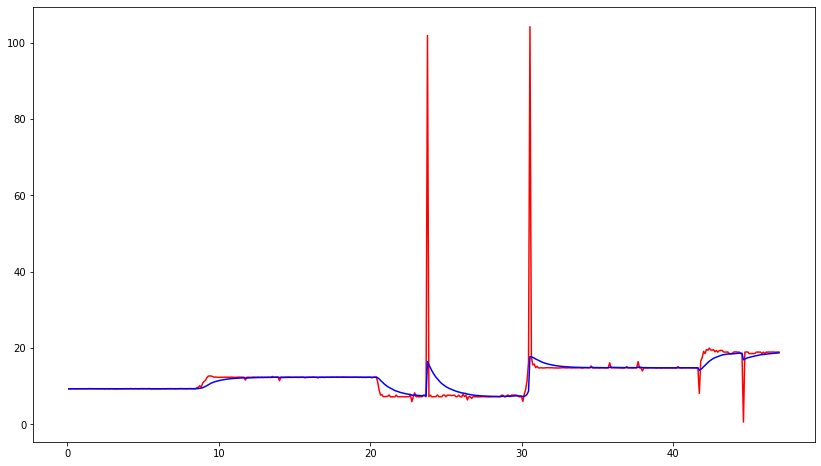

In [23]:
fig = plt.figure(figsize = (14, 8))
ax = fig.add_subplot()

ax.plot(x_time, sensor_data_, color = "red", )
ax.plot(x_time, kalman_estimation_, color = "blue", )